In [207]:
import pandas as pd
import numpy as np
import sckit
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
gam=pd.read_csv("Housing.csv")
gam.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [209]:
gam['mainroad']=(gam['mainroad']=='yes').astype(int)
gam['guestroom']=(gam['guestroom']=='yes').astype(int)
gam['basement']=(gam['basement']=='yes').astype(int)
gam['hotwaterheating']=(gam['hotwaterheating']=='yes').astype(int)
gam['airconditioning']=(gam['airconditioning']=='yes').astype(int)
gam['prefarea']=(gam['prefarea']=='yes').astype(int)
gam['furnishingstatus']=gam['furnishingstatus'].map({'furnished':2, 'semi-furnished':1,'unfurnished':0})
gam.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [210]:
corr_matrix=gam.corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


In [211]:
target_corr= corr_matrix['price'].abs().sort_values(ascending=False)
top_columns= target_corr.nlargest(10).index
print(top_columns)

Index(['price', 'area', 'bathrooms', 'airconditioning', 'stories', 'parking',
       'bedrooms', 'prefarea', 'furnishingstatus', 'mainroad'],
      dtype='object')


In [212]:
X = gam.drop("price", axis=1).values
X = (X - X.min()) / (X.max() - X.min())
y = gam["price"].values
y.shape, X.shape
print(type(y), type(X))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [213]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(x_train, y_train)

y_pred=Lr.predict(x_test)

In [215]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error

rmse=root_mean_squared_error(y_test, y_pred)
rmse

1331071.4167895098

In [216]:
accurate_score=100-(rmse/(y.max()-y.mean())*100)
accurate_score

np.float64(84.40139243874638)

In [217]:
r2_score(y_test,y_pred)

0.6494754192267809

In [218]:
mean_absolute_error(y_test,y_pred)

979679.6912959907

In [219]:
def predict_house_prices(data):
    # data=pd.get_dummies(data, columns=[['mainroad', 'guestroom', 'basement', 'hotwaterheating',	'airconditioning']])
    X = data.drop("price", axis=1)
    y = data["price"]
    
    Lr=LinearRegression()
    Lr.fit(x_train, y_train)

    y_pred=Lr.predict(x_test)
    return y_pred
data=pd.read_csv('Housing.csv')  
predictions=predict_house_prices(data) 

In [220]:
#Lasso and Ridge regression
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
ridge_pred=ridge.predict(x_test)
print('ridge_RMSE:',root_mean_squared_error(y_test, ridge_pred))
print('ridge_MSE:',mean_squared_error(y_test, ridge_pred))


ridge_RMSE: 1940203.3421055556
ridge_MSE: 3764389008717.568


In [221]:
lasso=Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
lasso_pred=lasso.predict(x_test)
print('ridge_RMSE:',root_mean_squared_error(y_test, lasso_pred))
print('ridge_MSE:',mean_squared_error(y_test, lasso_pred))


ridge_RMSE: 1356735.8551899455
ridge_MSE: 1840732180757.993


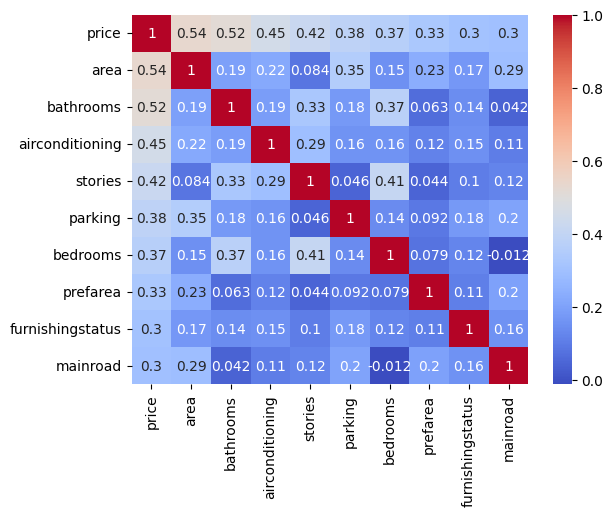

In [222]:
plt.Figure(figsize=(10,8))
sns.heatmap(corr_matrix.loc[top_columns, top_columns], annot=True, cmap='coolwarm')
plt.show()

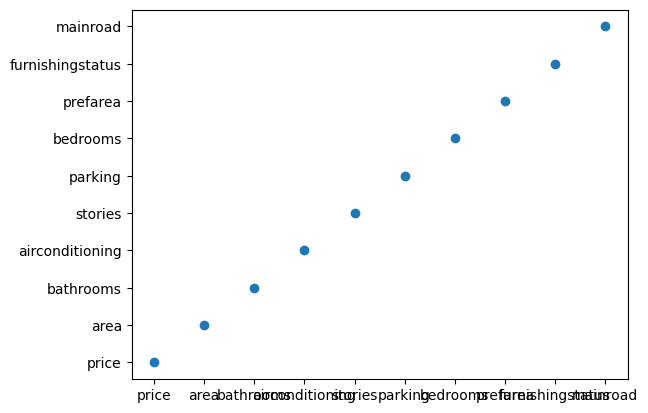

In [223]:
plt.scatter(top_columns,top_columns)
plt.show()

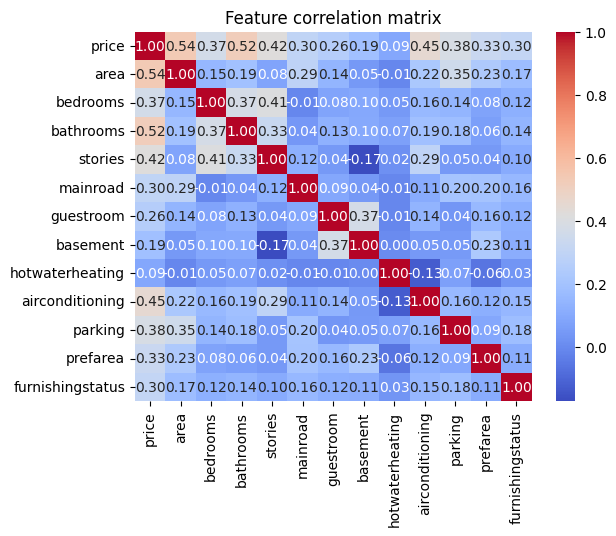

In [225]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature correlation matrix")
plt.show()

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x=add_constant(gam)
vif_data=pd.DataFrame()
vif_data['Feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values, i)for i in range(x.shape[1])]

print(vif_data)

             Feature        VIF
0              const  26.799072
1              price   3.125675
2               area   1.575520
3           bedrooms   1.374450
4          bathrooms   1.507141
5            stories   1.614414
6           mainroad   1.192100
7          guestroom   1.224319
8           basement   1.346852
9    hotwaterheating   1.069145
10   airconditioning   1.348140
11           parking   1.263875
12          prefarea   1.215941
13  furnishingstatus   1.119180


In [229]:
from sklearn.linear_model import RidgeCV, LassoCV
ridge_cv=RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(x_train, y_train)
print("Best lasso alpha:",ridge_cv.alpha_)

Best lasso alpha: 1.0


In [231]:
lasso_cv=RidgeCV(alphas=[0.01, 1.0, 10.0], cv=5)
lasso_cv.fit(x_train, y_train)
print("Best lasso alpha:",lasso_cv.alpha_)

Best lasso alpha: 1.0


In [232]:
print("Ridge coefficient:",ridge_cv.coef_)
print("Lasso coefficient:",lasso_cv.coef_)

Ridge coefficient: [6.13506810e+06 1.05181970e+04 9.86851734e+03 1.50502314e+04
 2.73269099e+03 3.27640130e+03 4.24535096e+03 8.00387621e+02
 8.03194159e+03 8.81697310e+03 4.02663246e+03 8.59930773e+03]
Lasso coefficient: [6.13506810e+06 1.05181970e+04 9.86851734e+03 1.50502314e+04
 2.73269099e+03 3.27640130e+03 4.24535096e+03 8.00387621e+02
 8.03194159e+03 8.81697310e+03 4.02663246e+03 8.59930773e+03]
